In [21]:
import pandas as pd
import numpy as np

In [22]:
from sklearn.datasets._samples_generator import make_regression
X, y = make_regression(n_samples=200, n_features=2, n_informative=2, noise=5, bias=30, random_state=42)

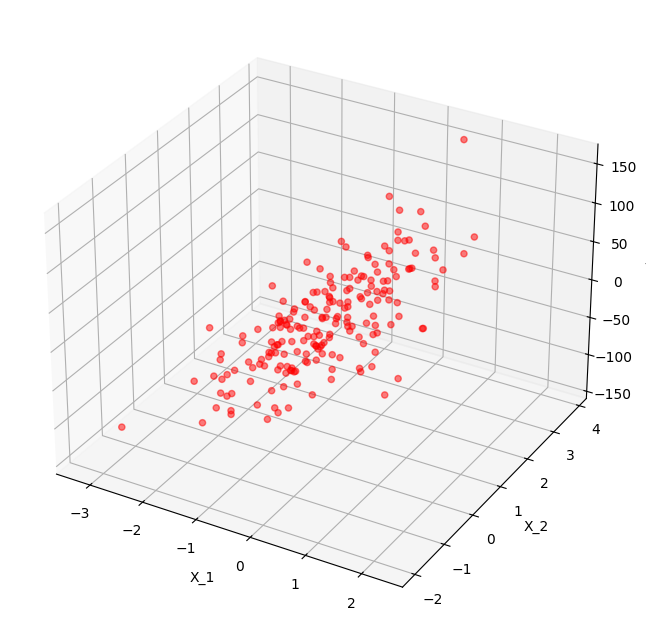

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='red', alpha=0.5, marker='o')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('y')
plt.show()

In [24]:
#Min-max noramlization
def min_max_norm(X):
    for i in range(X.shape[1]):
        x_min = np.min(X[:,i]) 
        x_max = np.max(X[:,i])

        X[:,i] = (X[:,i] - x_min) / (x_max - x_min)

    return X

In [25]:
def nearest_neighbors(k, X, new_point):
    neighbors = []
    for i in range(len(X)):
        distance = np.sqrt(sum(np.square(X[i]-new_point)))
        neighbors.append((i, distance))
    neighbors = sorted(neighbors, key = lambda x: x[1])

    return neighbors[:k]

In [26]:
def regressor(neighbors, y):
    ys = [y[i[0]] for i in neighbors]
    avg_y = np.mean(ys)
    return avg_y

In [34]:
new_points = np.array([
                        [-12,10],
                        [5,15],
                        [6,7],
                        [2,-6]
                    ])

new_points = min_max_norm(new_points)

In [35]:
knn = nearest_neighbors(4, X, new_points[1])
regressor(knn, y)

np.float64(53.490243476806626)